In [ ]:
# 文件內容： TEDS 分析 

In [1]:
# 環境 setup
%matplotlib notebook
from dbfread import DBF
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
point_file = "dataset/TEDS10 POINT TWD97.dbf" 
line_file = "dataset/TEDS10_LINE_TWD97.dbf"
area_file = "dataset/TEDS10_AREA_WGS84.dbf"

import ezodf
def read_ods(filename, sheet_no=0, header=0):
    tab = ezodf.opendoc(filename=filename).sheets[sheet_no]
    return pd.DataFrame({col[header].value:[x.value for x in col[header+1:]]
                         for col in tab.columns()})
town_df = read_ods('dataset/db.ods',0,0)
city_df = read_ods('dataset/db.ods',1,0)

In [75]:
# 已有點線面和資料檔，而且不需要單獨分析點，線，面 可以直些使用這個
pla_df = pd.read_csv('dataset/點線面_鄉鎮_PM25.csv')

In [ ]:
# study history
# 點源 dbf 可以 load, 但是整個印出來會有 unicode error
# 點源 sdf 不可以直接 load
# 點,線,面源載入都需要好幾分鐘 轉 df 需 5 分鐘

In [3]:
# 載入點源
from dbfread import DBF
import pandas as pd 
point_file = "dataset/TEDS10 POINT TWD97.dbf" 
line_file = "dataset/TEDS10_LINE_TWD97.dbf"
area_file = "dataset/TEDS10_AREA_WGS84.dbf"
point_file1 = "dataset/TEDS10 POINT TWD97.dbf" 
point_table = DBF(point_file,char_decode_errors='ignore',encoding='big5',load=True)
cols = []
for field in point_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
point_df = pd.DataFrame(point_table.records,  columns =cols) 
point_df


,SERIAL_NO,DICT_NO,C_NO,SCC,NO_P,FC,TSP_EMI,PM_EMI,X_BLANK1,PM25_EMI,...,PB_EFF,ID_AREA,COMP_NAM,ZS,TSP_RANK,SOX_RANK,NOX_RANK,VOC_RANK,CO_RANK,PB_RANK
0,1,0101,A3400047,10200602,E003,FUL,0.049,0.046,0,0.044,...,0.0,99,兄弟大飯店股份有限公司。,0,B,B,B,U,D,D
1,2,0101,A3400047,10200602,E004,FUL,0.000,0.000,0,0.000,...,0.0,99,兄弟大飯店股份有限公司。,0,B,B,B,U,D,D
2,3,0101,A3400047,40100103,E001,,0.000,0.000,0,0.000,...,0.0,99,兄弟大飯店股份有限公司。,0,D,B,B,D,D,D
3,4,0101,A3400109,10200602,E001,FUL,0.000,0.000,0,0.000,...,0.0,99,財團法人基督復臨安息日會台安醫院。,0,B,D,D,U,D,D
4,5,0101,A3400109,10200602,E002,FUL,0.000,0.000,0,0.000,...,0.0,99,財團法人基督復臨安息日會台安醫院。,0,B,D,D,U,D,D
5,6,0101,A3400118,10200603,E001,FUL,0.000,0.000,0,0.000,...,0.0,99,長庚醫療財團法人長庚紀念醫院。,0,C,D,D,U,D,D
6,7,0101,A3400118,10200603,E002,FUL,0.000,0.000,0,0.000,...,0.0,99,長庚醫療財團法人長庚紀念醫院。,0,C,D,D,U,D,D
7,8,0101,A3400172,10200602,E004,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D
8,9,0101,A3400172,10200602,E005,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D
9,10,0101,A3400172,10200602,E006,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D


In [13]:
# 載入線源
from dbfread import DBF
import pandas as pd 
point_file = "dataset/TEDS10 POINT TWD97.dbf" 
line_file = "dataset/TEDS10_LINE_TWD97.dbf"
area_file = "dataset/TEDS10_AREA_WGS84.dbf"

line_table = DBF(line_file,char_decode_errors='ignore',encoding='big5',load=True)
cols = []
for field in line_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
line_df = pd.DataFrame(line_table.records,  columns =cols) 
line_df

,NSC,NSC_SUB,UTME,UTMN,DICT,EM_TSP,EM_PM,EM_PM6,EM_PM25,EM_SOX,EM_NOX,EM_THC,EM_NMHC,EM_EXHC,EM_EHC,EM_RHC,EM_RST,EM_CO,EM_PB,EM_NH3
0,pldgv,1,168000,2553000,4121,0.064520,0.036838,0.0,0.026573,0.000330,0.181514,0.181595,0.163323,0.059609,0.068341,0.030411,0.023234,0.276882,0.000070,0.0
1,bldgv,1,168000,2553000,4121,0.002899,0.001655,0.0,0.001194,0.000017,0.002922,0.004787,0.004305,0.001952,0.001250,0.001167,0.000418,0.005721,0.000004,0.0
2,plddv,1,168000,2553000,4121,0.004339,0.002552,0.0,0.001880,0.000034,0.008344,0.000404,0.000404,0.000404,0.000000,0.000000,0.000000,0.002240,0.000000,0.0
3,blddv,1,168000,2553000,4121,0.000461,0.000256,0.0,0.000181,0.000004,0.000611,0.000057,0.000057,0.000057,0.000000,0.000000,0.000000,0.000261,0.000000,0.0
4,pldgt,1,168000,2553000,4121,0.010155,0.005836,0.0,0.004227,0.000068,0.088686,0.089420,0.080415,0.066015,0.014197,0.005613,0.003595,0.441811,0.000014,0.0
5,bldgt,1,168000,2553000,4121,0.000211,0.000121,0.0,0.000087,0.000002,0.000027,0.000339,0.000305,0.000140,0.000107,0.000046,0.000046,0.000357,0.000000,0.0
6,plddt,1,168000,2553000,4121,0.031218,0.026653,0.0,0.023327,0.000092,0.116640,0.004923,0.004923,0.004923,0.000000,0.000000,0.000000,0.042281,0.000000,0.0
7,blddt,1,168000,2553000,4121,0.000737,0.000465,0.0,0.000357,0.000006,0.001712,0.000168,0.000168,0.000168,0.000000,0.000000,0.000000,0.000638,0.000000,0.0
8,phdgv,1,168000,2553000,4121,0.000016,0.000013,0.0,0.000011,0.000000,0.000240,0.000009,0.000009,0.000009,0.000000,0.000000,0.000000,0.000036,0.000000,0.0
9,bhdgv,1,168000,2553000,4121,0.000575,0.000407,0.0,0.000331,0.000003,0.007633,0.000230,0.000230,0.000230,0.000000,0.000000,0.000000,0.001269,0.000000,0.0


In [4]:
# 載入面源 ，轉 df 需 5 分鐘
from dbfread import DBF
import pandas as pd 
point_file = "dataset/TEDS10 POINT TWD97.dbf" 
line_file = "dataset/TEDS10_LINE_TWD97.dbf"
area_file = "dataset/TEDS10_AREA_WGS84.dbf"

area_table = DBF(area_file,char_decode_errors='ignore',encoding='big5',load=True)
cols = []
for field in area_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
area_df = pd.DataFrame(area_table.records,  columns =cols) 
area_df

,WGS84_E,WGS84_N,NSC,NSC_SUB,DICT,EM_TSP,EM_PM,EM_PM6,EM_PM25,EM_SOX,EM_NOX,EM_THC,EM_NMHC,EM_CO,EM_PB,EM_NH3
0,121.53513,25.03716,1,,0101,0.001463,0.001404,0.0,0.001316,0.006809,0.027165,0.002090,0.001672,0.015672,0.0,0.0
1,121.53517,25.04619,1,,0101,0.008405,0.008069,0.0,0.007565,0.039124,0.156094,0.012007,0.009606,0.090054,0.0,0.0
2,121.53521,25.05521,1,,0101,0.010621,0.010196,0.0,0.009559,0.049438,0.197247,0.015173,0.012138,0.113796,0.0,0.0
3,121.53524,25.06424,1,,0101,0.004287,0.004115,0.0,0.003858,0.019955,0.079615,0.006124,0.004899,0.045932,0.0,0.0
4,121.54504,25.03712,1,,0101,0.036153,0.034707,0.0,0.032537,0.168282,0.671408,0.051647,0.041317,0.387351,0.0,0.0
5,121.54508,25.04615,1,,0101,0.133488,0.128148,0.0,0.120139,0.621354,2.479060,0.190697,0.152558,1.430227,0.0,0.0
6,121.54512,25.05518,1,,0101,0.134252,0.128882,0.0,0.120826,0.624909,2.493244,0.191788,0.153430,1.438410,0.0,0.0
7,121.54516,25.06421,1,,0101,0.006858,0.006584,0.0,0.006172,0.031924,0.127369,0.009798,0.007838,0.073482,0.0,0.0
8,121.54520,25.07323,1,,0101,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,121.55495,25.03709,1,,0101,0.013381,0.012846,0.0,0.012043,0.062287,0.248513,0.019116,0.015293,0.143373,0.0,0.0


In [420]:
# 點線面 資料狀況描述
#point_df
#line_df
#area_df
#pd.set_option('display.max_rows', None)
dfs = [['點源',point_df,point_table],['線源',line_df,line_table],['面源',area_df,area_table]]
#dfs = [['線源',line_df, line_table]]
for name, tmp_df, tmp_table in dfs:
    print("---- %s 資料狀況描述 ----" %(name))
    print(tmp_df.shape)
    print("---- columns ----\n%s" % tmp_df.columns)
    print("---- first record ----")
    print(tmp_df.iloc[0])
    print("---- field definition ----")
    # col definition
    for field in tmp_table.fields:
        print("name=%s,type=%s" %(field.name,field.type))


---- 點源 資料狀況描述 ----
(218004, 72)
---- columns ----
Index(['SERIAL_NO', 'DICT_NO', 'C_NO', 'SCC', 'NO_P', 'FC', 'TSP_EMI',
       'PM_EMI', 'X_BLANK1', 'PM25_EMI', 'SOX_EMI', 'NOX_EMI', 'THC_EMI',
       'NMHC_EMI', 'CO_EMI', 'PB_EMI', 'COMP_KIND1', 'UTM_E', 'UTM_N',
       'ORI_QU1', 'X_BLANK2', 'DIA', 'X_BLANK3', 'HEI', 'X_BLANK4', 'TEMP',
       'X_BLANK5', 'VEL', 'ASSUME_Q', 'ASSUME_D', 'ASSUME_H', 'ASSUME_T',
       'ASSUME_V', 'NO_S', 'ASSUME_HD', 'HD1', 'ASSUME_DW', 'DW1', 'ASSUME_WY',
       'WY1', 'X_BLANK6', 'X_BLANK7', 'X_BLANK8', 'X_BLANK9', 'X_BLANK10',
       'X_BLANK11', 'EQ_1', 'A_NAME1', 'EQ_2', 'A_NAME2', 'EQ_3', 'A_NAME3',
       'EQ_4', 'A_NAME4', 'EQ_5', 'A_NAME5', 'TSP_EFF', 'TSP_EFF1', 'SOX_EFF',
       'NOX_EFF', 'VOC_EFF', 'CO_EFF', 'PB_EFF', 'ID_AREA', 'COMP_NAM', 'ZS',
       'TSP_RANK', 'SOX_RANK', 'NOX_RANK', 'VOC_RANK', 'CO_RANK', 'PB_RANK'],
      dtype='object')
---- first record ----
SERIAL_NO                1
DICT_NO               0101
C_NO             

In [ ]:
"""
---- 點源 資料狀況描述 ----
(218004, 72)
---- columns ----
Index(['SERIAL_NO', 'DICT_NO', 'C_NO', 'SCC', 'NO_P', 'FC', 'TSP_EMI',
       'PM_EMI', 'X_BLANK1', 'PM25_EMI', 'SOX_EMI', 'NOX_EMI', 'THC_EMI',
       'NMHC_EMI', 'CO_EMI', 'PB_EMI', 'COMP_KIND1', 'UTM_E', 'UTM_N',
       'ORI_QU1', 'X_BLANK2', 'DIA', 'X_BLANK3', 'HEI', 'X_BLANK4', 'TEMP',
       'X_BLANK5', 'VEL', 'ASSUME_Q', 'ASSUME_D', 'ASSUME_H', 'ASSUME_T',
       'ASSUME_V', 'NO_S', 'ASSUME_HD', 'HD1', 'ASSUME_DW', 'DW1', 'ASSUME_WY',
       'WY1', 'X_BLANK6', 'X_BLANK7', 'X_BLANK8', 'X_BLANK9', 'X_BLANK10',
       'X_BLANK11', 'EQ_1', 'A_NAME1', 'EQ_2', 'A_NAME2', 'EQ_3', 'A_NAME3',
       'EQ_4', 'A_NAME4', 'EQ_5', 'A_NAME5', 'TSP_EFF', 'TSP_EFF1', 'SOX_EFF',
       'NOX_EFF', 'VOC_EFF', 'CO_EFF', 'PB_EFF', 'ID_AREA', 'COMP_NAM', 'ZS',
       'TSP_RANK', 'SOX_RANK', 'NOX_RANK', 'VOC_RANK', 'CO_RANK', 'PB_RANK'],
      dtype='object')
---- first record ----
SERIAL_NO                1
DICT_NO               0101
C_NO              A3400047
SCC               10200602
NO_P                  E003
FC                     FUL
TSP_EMI              0.049
PM_EMI               0.046
X_BLANK1                 0
PM25_EMI             0.044
SOX_EMI                  0
NOX_EMI               1.53
THC_EMI                  0
NMHC_EMI                 0
CO_EMI                0.36
PB_EMI                   0
COMP_KIND1            5510
UTM_E               304946
UTM_N              2771708
ORI_QU1               92.8
X_BLANK2                  
DIA                    1.1
X_BLANK3                  
HEI                   51.1
X_BLANK4                  
TEMP                    70
X_BLANK5                  
VEL                    2.2
ASSUME_Q                  
ASSUME_D                  
ASSUME_H                  
ASSUME_T                  
ASSUME_V                  
NO_S                  P002
ASSUME_HD                 
HD1                     15
ASSUME_DW                 
DW1                      7
ASSUME_WY                 
WY1                     52
X_BLANK6                  
X_BLANK7                 0
X_BLANK8                  
X_BLANK9                  
X_BLANK10                0
X_BLANK11                0
EQ_1                      
A_NAME1                  　
EQ_2                      
A_NAME2                  　
EQ_3                      
A_NAME3                  　
EQ_4                      
A_NAME4                  　
EQ_5                      
A_NAME5                  　
TSP_EFF                  0
TSP_EFF1                 0
SOX_EFF                  0
NOX_EFF                  0
VOC_EFF                  0
CO_EFF                   0
PB_EFF                   0
ID_AREA                 99
COMP_NAM      兄弟大飯店股份有限公司。
ZS                       0
TSP_RANK                 B
SOX_RANK                 B
NOX_RANK                 B
VOC_RANK                 U
CO_RANK                  D
PB_RANK                  D
Name: 0, dtype: object
---- field definition ----
name=SERIAL_NO,type=N
name=DICT_NO,type=C
name=C_NO,type=C
name=SCC,type=C
name=NO_P,type=C
name=FC,type=C
name=TSP_EMI,type=N
name=PM_EMI,type=N
name=X_BLANK1,type=N
name=PM25_EMI,type=N
name=SOX_EMI,type=N
name=NOX_EMI,type=N
name=THC_EMI,type=N
name=NMHC_EMI,type=N
name=CO_EMI,type=N
name=PB_EMI,type=N
name=COMP_KIND1,type=C
name=UTM_E,type=C
name=UTM_N,type=C
name=ORI_QU1,type=N
name=X_BLANK2,type=C
name=DIA,type=N
name=X_BLANK3,type=C
name=HEI,type=N
name=X_BLANK4,type=C
name=TEMP,type=N
name=X_BLANK5,type=C
name=VEL,type=N
name=ASSUME_Q,type=C
name=ASSUME_D,type=C
name=ASSUME_H,type=C
name=ASSUME_T,type=C
name=ASSUME_V,type=C
name=NO_S,type=C
name=ASSUME_HD,type=C
name=HD1,type=N
name=ASSUME_DW,type=C
name=DW1,type=N
name=ASSUME_WY,type=C
name=WY1,type=N
name=X_BLANK6,type=C
name=X_BLANK7,type=N
name=X_BLANK8,type=C
name=X_BLANK9,type=C
name=X_BLANK10,type=N
name=X_BLANK11,type=N
name=EQ_1,type=C
name=A_NAME1,type=C
name=EQ_2,type=C
name=A_NAME2,type=C
name=EQ_3,type=C
name=A_NAME3,type=C
name=EQ_4,type=C
name=A_NAME4,type=C
name=EQ_5,type=C
name=A_NAME5,type=C
name=TSP_EFF,type=N
name=TSP_EFF1,type=N
name=SOX_EFF,type=N
name=NOX_EFF,type=N
name=VOC_EFF,type=N
name=CO_EFF,type=N
name=PB_EFF,type=N
name=ID_AREA,type=C
name=COMP_NAM,type=C
name=ZS,type=N
name=TSP_RANK,type=C
name=SOX_RANK,type=C
name=NOX_RANK,type=C
name=VOC_RANK,type=C
name=CO_RANK,type=C
name=PB_RANK,type=C
---- 線源 資料狀況描述 ----
(620067, 20)
---- columns ----
Index(['NSC', 'NSC_SUB', 'UTME', 'UTMN', 'DICT', 'EM_TSP', 'EM_PM', 'EM_PM6',
       'EM_PM25', 'EM_SOX', 'EM_NOX', 'EM_THC', 'EM_NMHC', 'EM_EXHC', 'EM_EHC',
       'EM_RHC', 'EM_RST', 'EM_CO', 'EM_PB', 'EM_NH3'],
      dtype='object')
---- first record ----
NSC           pldgv
NSC_SUB           1
UTME         168000
UTMN        2553000
DICT           4121
EM_TSP      0.06452
EM_PM      0.036838
EM_PM6            0
EM_PM25    0.026573
EM_SOX      0.00033
EM_NOX     0.181514
EM_THC     0.181595
EM_NMHC    0.163323
EM_EXHC    0.059609
EM_EHC     0.068341
EM_RHC     0.030411
EM_RST     0.023234
EM_CO      0.276882
EM_PB         7e-05
EM_NH3            0
Name: 0, dtype: object
---- field definition ----
name=NSC,type=C
name=NSC_SUB,type=C
name=UTME,type=N
name=UTMN,type=N
name=DICT,type=C
name=EM_TSP,type=N
name=EM_PM,type=N
name=EM_PM6,type=N
name=EM_PM25,type=N
name=EM_SOX,type=N
name=EM_NOX,type=N
name=EM_THC,type=N
name=EM_NMHC,type=N
name=EM_EXHC,type=N
name=EM_EHC,type=N
name=EM_RHC,type=N
name=EM_RST,type=N
name=EM_CO,type=N
name=EM_PB,type=N
name=EM_NH3,type=N
---- 面源 資料狀況描述 ----
(2601530, 16)
---- columns ----
Index(['WGS84_E', 'WGS84_N', 'NSC', 'NSC_SUB', 'DICT', 'EM_TSP', 'EM_PM',
       'EM_PM6', 'EM_PM25', 'EM_SOX', 'EM_NOX', 'EM_THC', 'EM_NMHC', 'EM_CO',
       'EM_PB', 'EM_NH3'],
      dtype='object')
---- first record ----
WGS84_E     121.535
WGS84_N     25.0372
NSC               1
NSC_SUB            
DICT           0101
EM_TSP     0.001463
EM_PM      0.001404
EM_PM6            0
EM_PM25    0.001316
EM_SOX     0.006809
EM_NOX     0.027165
EM_THC      0.00209
EM_NMHC    0.001672
EM_CO      0.015672
EM_PB             0
EM_NH3            0
Name: 0, dtype: object
---- field definition ----
name=WGS84_E,type=N
name=WGS84_N,type=N
name=NSC,type=C
name=NSC_SUB,type=C
name=DICT,type=C
name=EM_TSP,type=N
name=EM_PM,type=N
name=EM_PM6,type=N
name=EM_PM25,type=N
name=EM_SOX,type=N
name=EM_NOX,type=N
name=EM_THC,type=N
name=EM_NMHC,type=N
name=EM_CO,type=N
name=EM_PB,type=N
name=EM_NH3,type=N
"""

In [7]:
point_df

,SERIAL_NO,DICT_NO,C_NO,SCC,NO_P,FC,TSP_EMI,PM_EMI,X_BLANK1,PM25_EMI,...,PB_EFF,ID_AREA,COMP_NAM,ZS,TSP_RANK,SOX_RANK,NOX_RANK,VOC_RANK,CO_RANK,PB_RANK
0,1,0101,A3400047,10200602,E003,FUL,0.049,0.046,0,0.044,...,0.0,99,兄弟大飯店股份有限公司。,0,B,B,B,U,D,D
1,2,0101,A3400047,10200602,E004,FUL,0.000,0.000,0,0.000,...,0.0,99,兄弟大飯店股份有限公司。,0,B,B,B,U,D,D
2,3,0101,A3400047,40100103,E001,,0.000,0.000,0,0.000,...,0.0,99,兄弟大飯店股份有限公司。,0,D,B,B,D,D,D
3,4,0101,A3400109,10200602,E001,FUL,0.000,0.000,0,0.000,...,0.0,99,財團法人基督復臨安息日會台安醫院。,0,B,D,D,U,D,D
4,5,0101,A3400109,10200602,E002,FUL,0.000,0.000,0,0.000,...,0.0,99,財團法人基督復臨安息日會台安醫院。,0,B,D,D,U,D,D
5,6,0101,A3400118,10200603,E001,FUL,0.000,0.000,0,0.000,...,0.0,99,長庚醫療財團法人長庚紀念醫院。,0,C,D,D,U,D,D
6,7,0101,A3400118,10200603,E002,FUL,0.000,0.000,0,0.000,...,0.0,99,長庚醫療財團法人長庚紀念醫院。,0,C,D,D,U,D,D
7,8,0101,A3400172,10200602,E004,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D
8,9,0101,A3400172,10200602,E005,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D
9,10,0101,A3400172,10200602,E006,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D


<IPython.core.display.Javascript object>


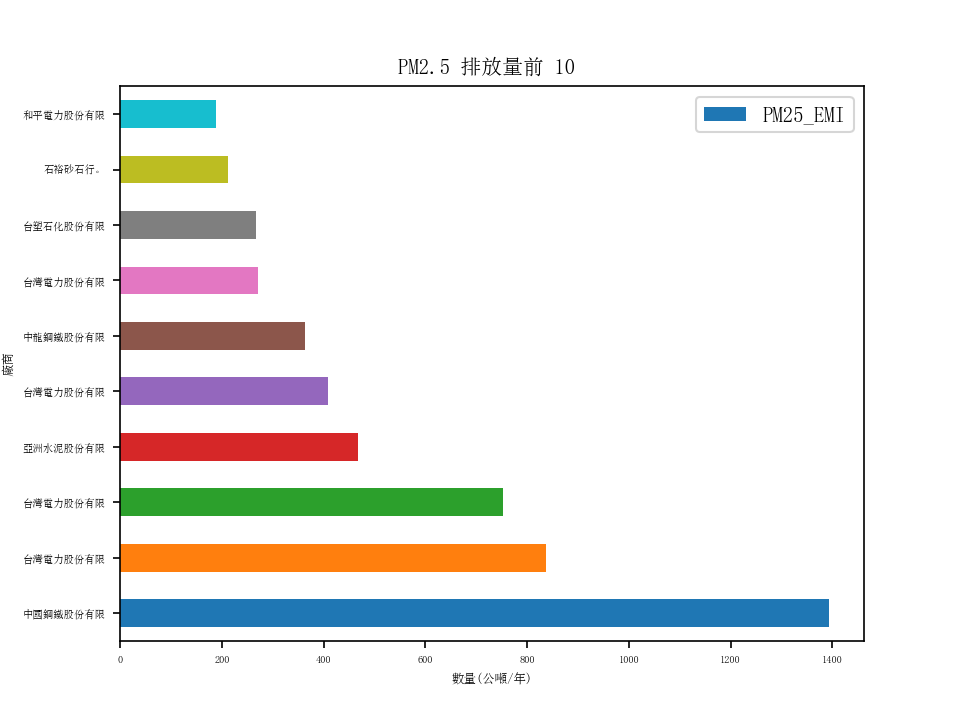

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [72]:
# 點源 PM2.5 排放量，依 管制編號 排序
mon_s = point_df.groupby('COMP_NAM')['PM25_EMI'].sum().sort_values(ascending=False)[:10]
df = pd.DataFrame(mon_s)
df=df.reset_index()
df['COMP_NAM']=df['COMP_NAM'].str[:8]
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df.plot('COMP_NAM',y='PM25_EMI',kind='barh') #line type have problem
plt.title("PM2.5 排放量前 10 ",fontproperties=myfont) 
plt.ylabel('廠商',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)
#point_df[point_df['COMP_NAM'].isin(mon_s.index)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
COMP_KIND1    10 non-null int64
PM25_EMI      10 non-null float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


<IPython.core.display.Javascript object>


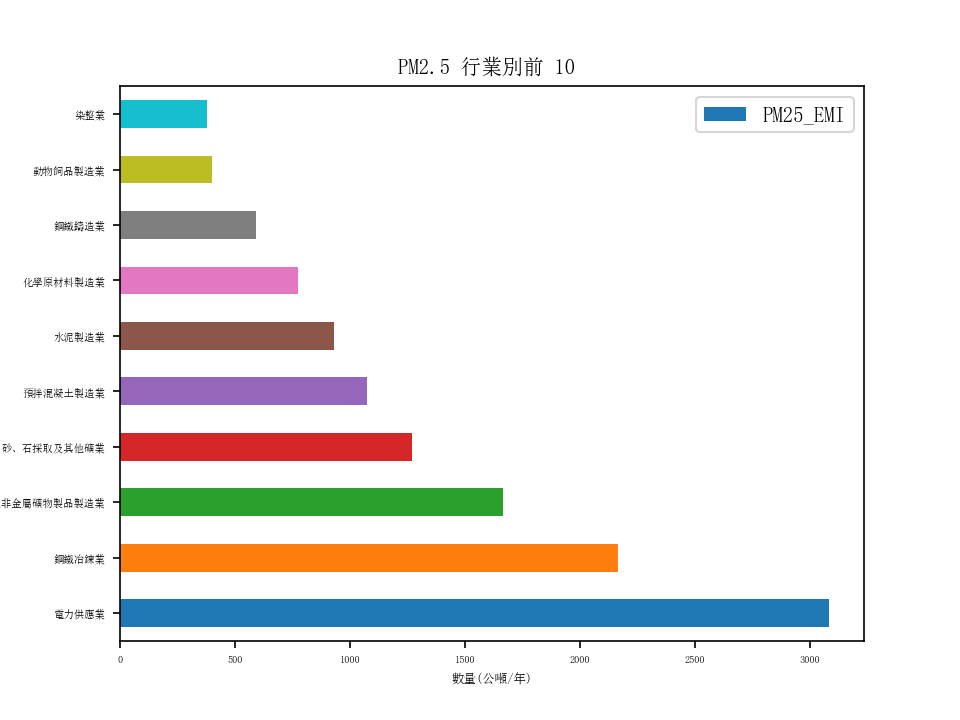

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [105]:
# 點源 PM2.5 行業別 排序，畫圖, 需先設定 board_df (從表TEDS-10 TEDS資料庫中行業別代碼對照表來)
mon_s = point_df.groupby('COMP_KIND1')['PM25_EMI'].sum().sort_values(ascending=False)[:10]
df = pd.DataFrame(mon_s)
df=df.reset_index()
df=df.astype({'COMP_KIND1': 'int64'})
df = pd.merge(df, board_df, left_on='COMP_KIND1',right_on='行業別代碼', how='left')
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df.plot('行業別名稱',y='PM25_EMI',kind='barh') #line type have problem
plt.title("PM2.5 行業別前 10 ",fontproperties=myfont) 
plt.ylabel('行業別',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)

In [86]:
board_df

,行業別代碼,行業別名稱
0,111,稻作栽培業
1,113,特用作物栽培業
2,116,食用菇蕈栽培業
3,117,花卉栽培業
4,121,牛飼育業
5,122,豬飼育業
6,129,其他畜牧業
7,130,農事及畜牧服務業
8,200,林業
9,500,石油及天然氣礦業


<IPython.core.display.Javascript object>


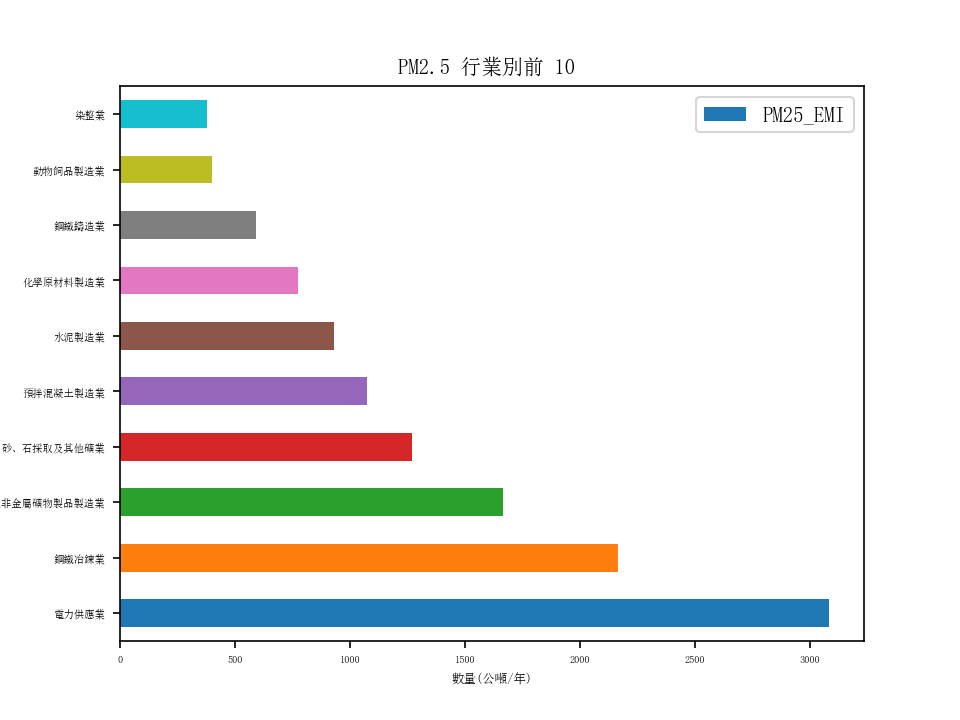

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [126]:
# 點源
# PM2.5 行業別 排序，畫圖
#mon_s = point_df.groupby('行業別名稱')['PM25_EMI'].sum().sort_values(ascending=False)[:10]
#df = pd.DataFrame(mon_s)
df=merge_df
#df['COMP_NAM']=df['COMP_NAM'].str[:8]
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df.plot('行業別名稱',y='PM25_EMI',kind='barh') #line type have problem
plt.title("PM2.5 行業別前 10 ",fontproperties=myfont) 
plt.ylabel('行業別',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)
#point_df[point_df['COMP_NAM'].isin(mon_s.index)]



In [73]:
#產生 點線面針對鄉鎮代號加總
point_cols=['TSP_EMI','PM_EMI','PM25_EMI','SOX_EMI','NOX_EMI','THC_EMI','NMHC_EMI','CO_EMI','PB_EMI']
point_cols1=['POINT_TSP','POINT_PM','POINT_PM25','POINT_SOX','POINT_NOX','POINT_THC','POINT_NMHC','POINT_CO','POINT_PB']
line_cols=['EM_TSP','EM_PM','EM_PM6','EM_PM25','EM_SOX','EM_NOX','EM_THC','EM_NMHC','EM_CO','EM_PB','EM_NH3']
line_cols1=['LINE_TSP','LINE_PM','LINE_PM6','LINE_PM25','LINE_SOX','LINE_NOX','LINE_THC','LINE_NMHC','LINE_CO','LINE_PB','LINE_NH3']
area_cols=['EM_TSP','EM_PM','EM_PM6','EM_PM25','EM_SOX','EM_NOX','EM_THC','EM_NMHC','EM_CO','EM_PB','EM_NH3']
area_cols1=['AREA_TSP','AREA_PM','AREA_PM6','AREA_PM25','AREA_SOX','AREA_NOX','AREA_THC','AREA_NMHC','AREA_CO','AREA_PB','AREA_NH3']
#pd.set_option('display.max_rows', 50)
dict_point = point_df.groupby('DICT_NO')[point_cols].sum()
dict_line = line_df.groupby('DICT')[line_cols].sum()
dict_area = area_df.groupby('DICT')[area_cols].sum()
df1 = pd.DataFrame(dict_point)
df2 = pd.DataFrame(dict_line)
df3 = pd.DataFrame(dict_area)
df1.columns=point_cols1
df2.columns=line_cols1
df3.columns=area_cols1

df4 = pd.concat([df1, df2], axis=1, sort=False)
df5 = pd.concat([df4, df3], axis=1, sort=False)
#df5.sort_index()
df4=df4.fillna(0)
df5=df5.fillna(0)
df5['SUM_TSP' ]=df5['LINE_TSP'] +df5['POINT_TSP'] +df5['AREA_TSP']
df5['SUM_PM'  ]=df5['LINE_PM']  +df5['POINT_PM']  +df5['AREA_PM']
df5['SUM_PM6' ]=df5['LINE_PM6'] +                 +df5['AREA_PM6']
df5['SUM_PM25']=df5['LINE_PM25']+df5['POINT_PM25'] +df5['AREA_PM25']
df5['SUM_SOX' ]=df5['LINE_SOX'] +df5['POINT_SOX'] +df5['AREA_SOX']
df5['SUM_NOX' ]=df5['LINE_NOX'] +df5['POINT_NOX'] +df5['AREA_NOX']
df5['SUM_THC' ]=df5['LINE_THC'] +df5['POINT_THC'] +df5['AREA_THC']
df5['SUM_NMHC']=df5['LINE_NMHC']+df5['POINT_NMHC']+df5['AREA_NMHC']
df5['SUM_CO'  ]=df5['LINE_CO']  +df5['POINT_CO']  +df5['AREA_CO']
df5['SUM_PB'  ]=df5['LINE_PB']  +df5['POINT_PB']  +df5['AREA_PB']
df5['SUM_NH3' ]=df5['LINE_NH3']                   +df5['AREA_NH3']

town_df = read_ods('dataset/db.ods',0,0)
df5=df5.reset_index()
pla_df = pd.merge(df5, town_df, left_on='index',right_on='鄉鎮代碼', how='left')
#pla_df

#pla_df
city_df = read_ods('dataset/db.ods',1,0).dropna()
pla_df['縣市代碼']=pla_df['鄉鎮代碼'].str[:2]
pla_df = pd.merge(pla_df, city_df.dropna(), left_on='縣市代碼',right_on='縣市代碼', how='left')
pla_df['AREA']=pla_df['縣市名稱']+pla_df['鄉鎮名稱']

townp_df=pd.read_csv('output/town_people.csv') #8410
townp_df = townp_df.drop('0',axis=1)

pla_df = pd.merge(pla_df, townp_df, left_on='AREA',right_on='區域別', how='left')
# 1200 新竹市,2200 嘉義市 沒有人口資料
#pla_df
pla_df.to_csv('output/點線面_鄉鎮_PM25.csv')

<IPython.core.display.Javascript object>


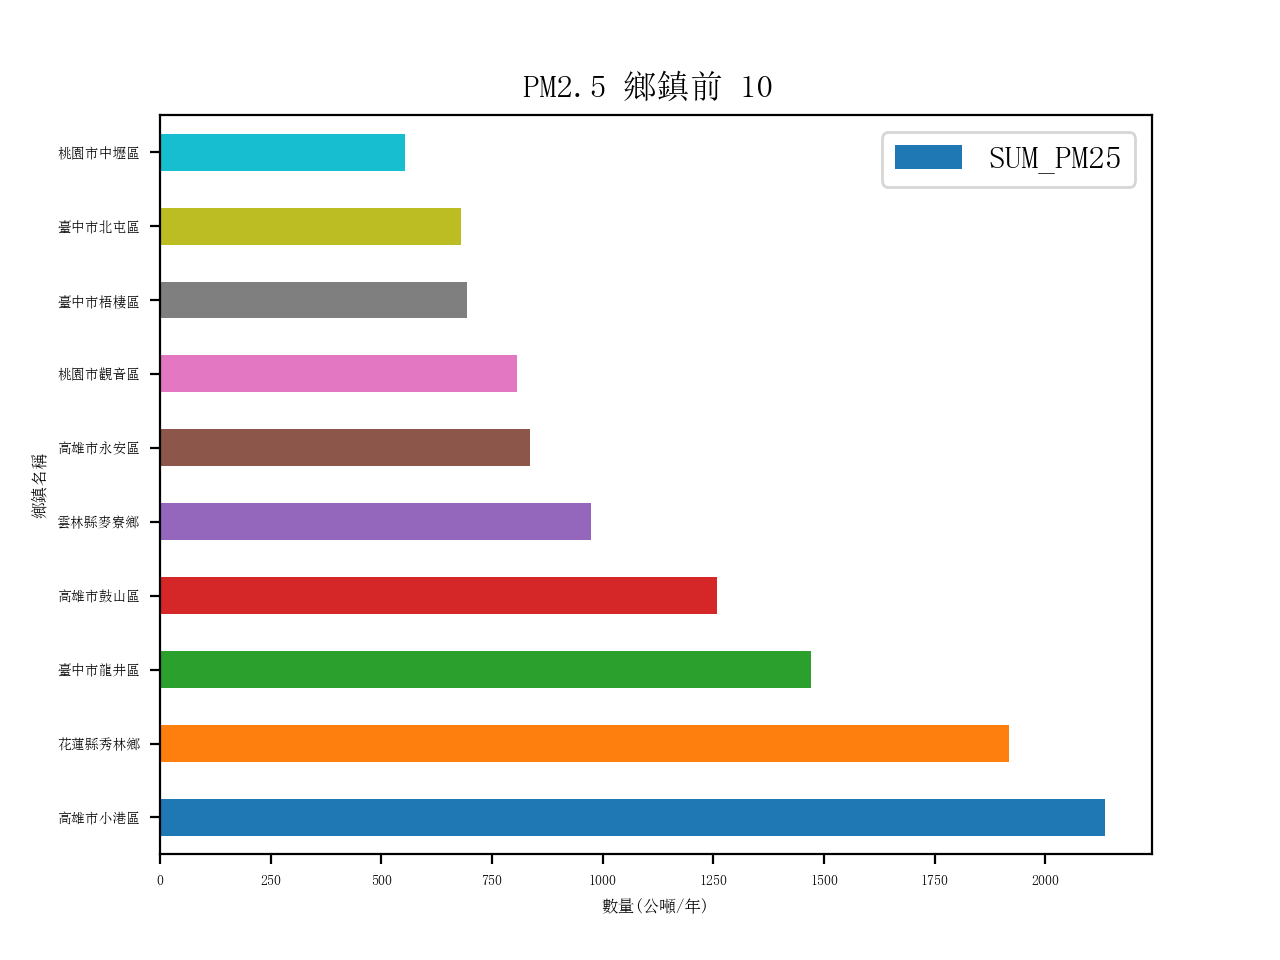

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [60]:
# 點線面鄉鎮 鄉鎮前十
#pd.set_option('display.max_columns', None)
df=pla_df.sort_values('SUM_PM25',ascending=False).head(10)

myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf',size=12)
df.plot('AREA',y='SUM_PM25',kind='barh') #line type have problem
plt.title("PM2.5 鄉鎮前 10 ",fontproperties=myfont) 
plt.ylabel('鄉鎮名稱',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)


<IPython.core.display.Javascript object>


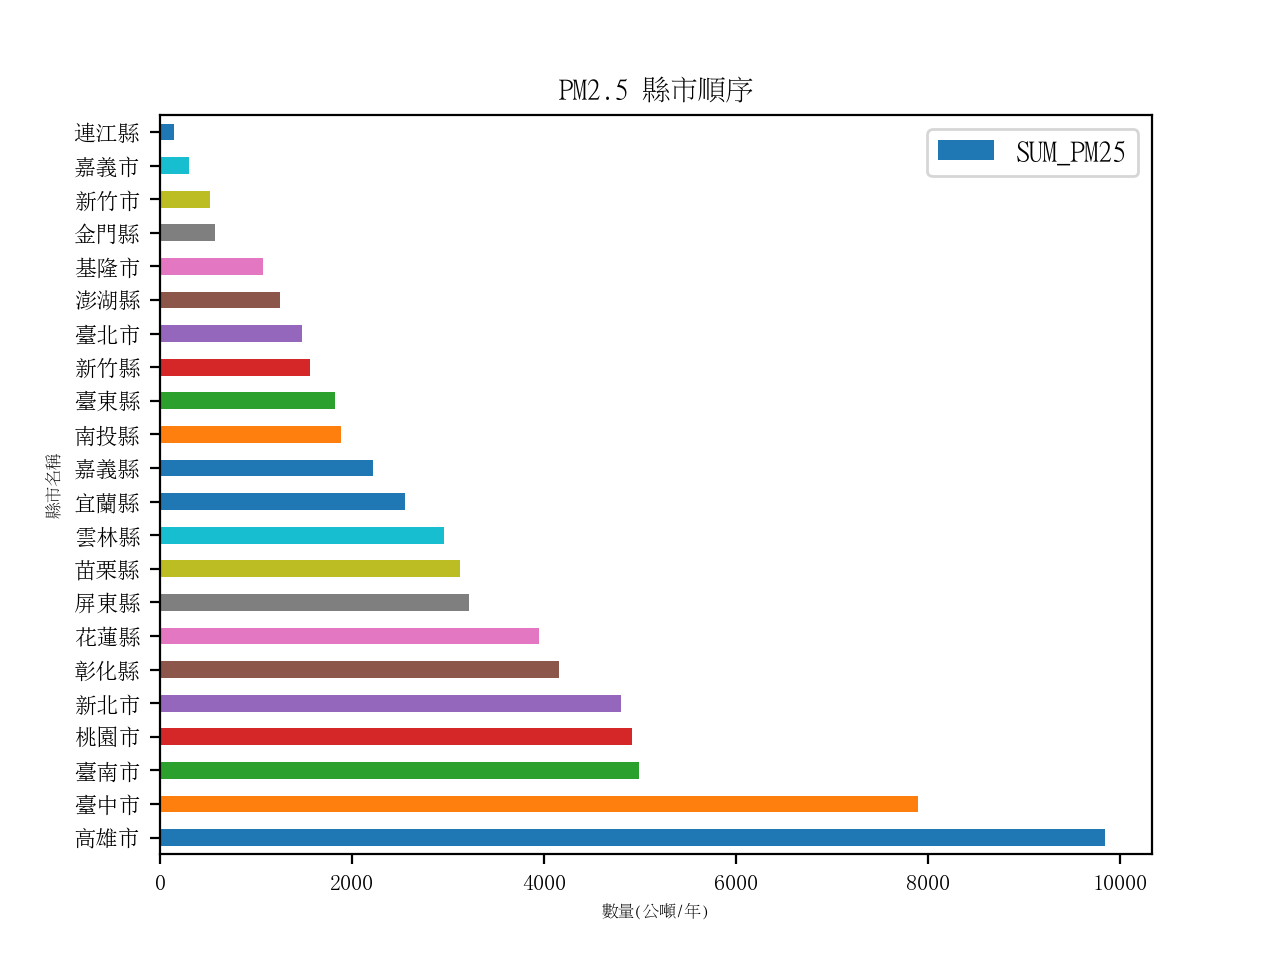

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text yticklabel objects>)

In [61]:
# 點線面鄉鎮 縣市前十
#pd.set_option('display.max_columns', None)
mon_s = pla_df.groupby('縣市名稱')['SUM_PM25'].sum().sort_values(ascending=False)

df = pd.DataFrame(mon_s)
df=df.reset_index()
#df=df.astype({'COMP_KIND1': 'int64'})

myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/MingLiU.ttf')
#df.plot.pie(x='縣市名稱',y='SUM_PM25',labels=df['縣市名稱'],legend = True, fontsize=14) #line type have problem
df.plot(x='縣市名稱',y='SUM_PM25',kind='barh') 
plt.title("PM2.5 縣市順序",fontproperties=myfont) 
plt.ylabel('縣市名稱',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=8)
plt.yticks(fontname = 'SimSun',size=8)


<IPython.core.display.Javascript object>


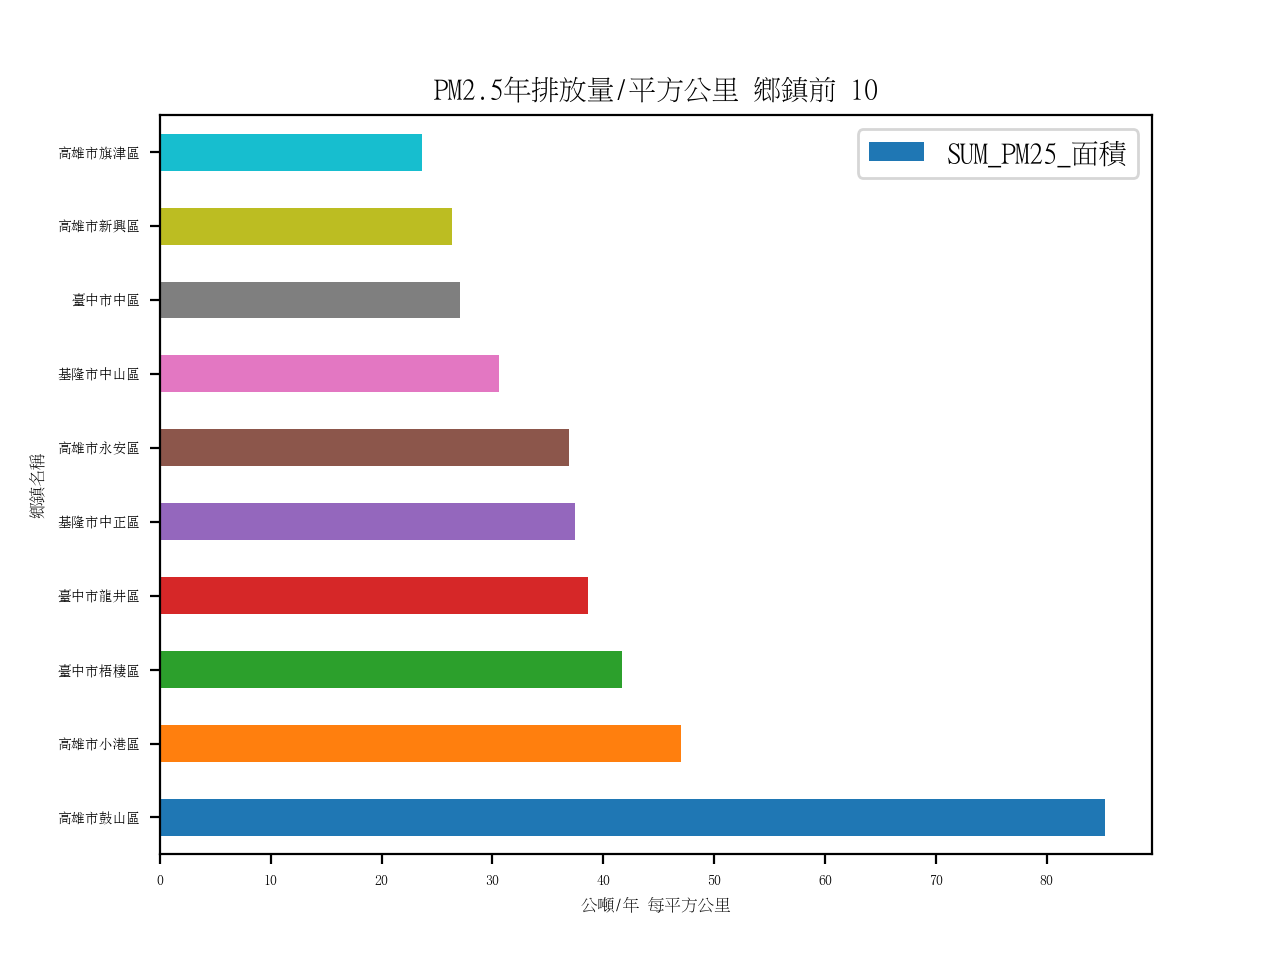

In [62]:
# 點線面鄉鎮 單位面積 鄉鎮前十
#pd.set_option('display.max_columns', None)
pla_df['SUM_PM25_面積']=pla_df['SUM_PM25']/pla_df['土地面積']
df=pla_df.sort_values('SUM_PM25_面積',ascending=False).head(10)

myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/MingLiU.ttf')
df.plot('AREA',y='SUM_PM25_面積',kind='barh',use_index=True) #line type have problem
plt.title("PM2.5年排放量/平方公里 鄉鎮前 10",fontproperties=myfont) 
plt.ylabel('鄉鎮名稱',fontproperties=myfont,size=6)
plt.xlabel('公噸/年 每平方公里',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)
plt.show()

<IPython.core.display.Javascript object>


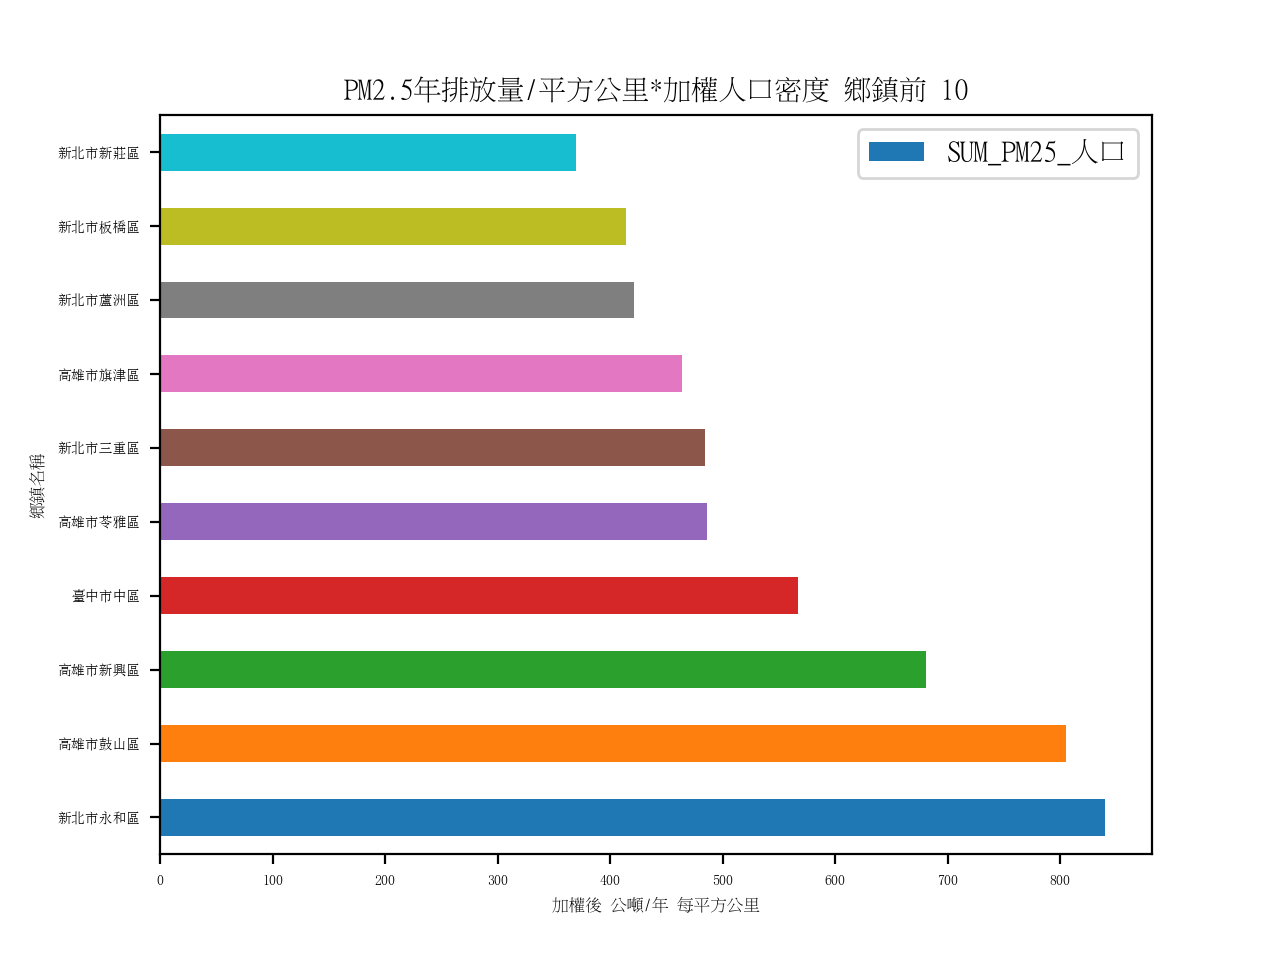

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [63]:
# 點線面鄉鎮 鄉鎮前十 by 人口加權
#pd.set_option('display.max_columns', None)
pla_df=pla_df.astype({'人口密度': 'float64'})
pla_df['SUM_PM25_人口']=pla_df['SUM_PM25']/pla_df['土地面積']*pla_df['人口密度']/1000 # 板橋 = 23835
df=pla_df.sort_values('SUM_PM25_人口',ascending=False).head(10)

myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/MingLiU.ttf')
df.plot('AREA',y='SUM_PM25_人口',kind='barh',use_index=True) #line type have problem
plt.title("PM2.5年排放量/平方公里*加權人口密度 鄉鎮前 10",fontproperties=myfont) 
plt.ylabel('鄉鎮名稱',fontproperties=myfont,size=6)
plt.xlabel('加權後 公噸/年 每平方公里',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)

In [70]:
# 每縣市的前三名
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pla_df.sort_values(['縣市名稱','SUM_PM25'],ascending=[1,0],inplace=True)
grouped = pla_df.groupby(['縣市名稱']).head(3)
grouped[['縣市名稱','鄉鎮名稱','SUM_PM25']]

,縣市名稱,鄉鎮名稱,SUM_PM25
171,南投縣,草屯鎮,314.762508
169,南投縣,南投市,283.013633
172,南投縣,竹山鎮,204.024533
332,嘉義市,西區,156.361628
331,嘉義市,東區,125.509460
45,嘉義市,嘉義市,17.592000
204,嘉義縣,民雄鄉,289.815805
211,嘉義縣,太保市,239.425647
212,嘉義縣,水上鄉,204.979843
23,基隆市,中正區,382.015349


<IPython.core.display.Javascript object>


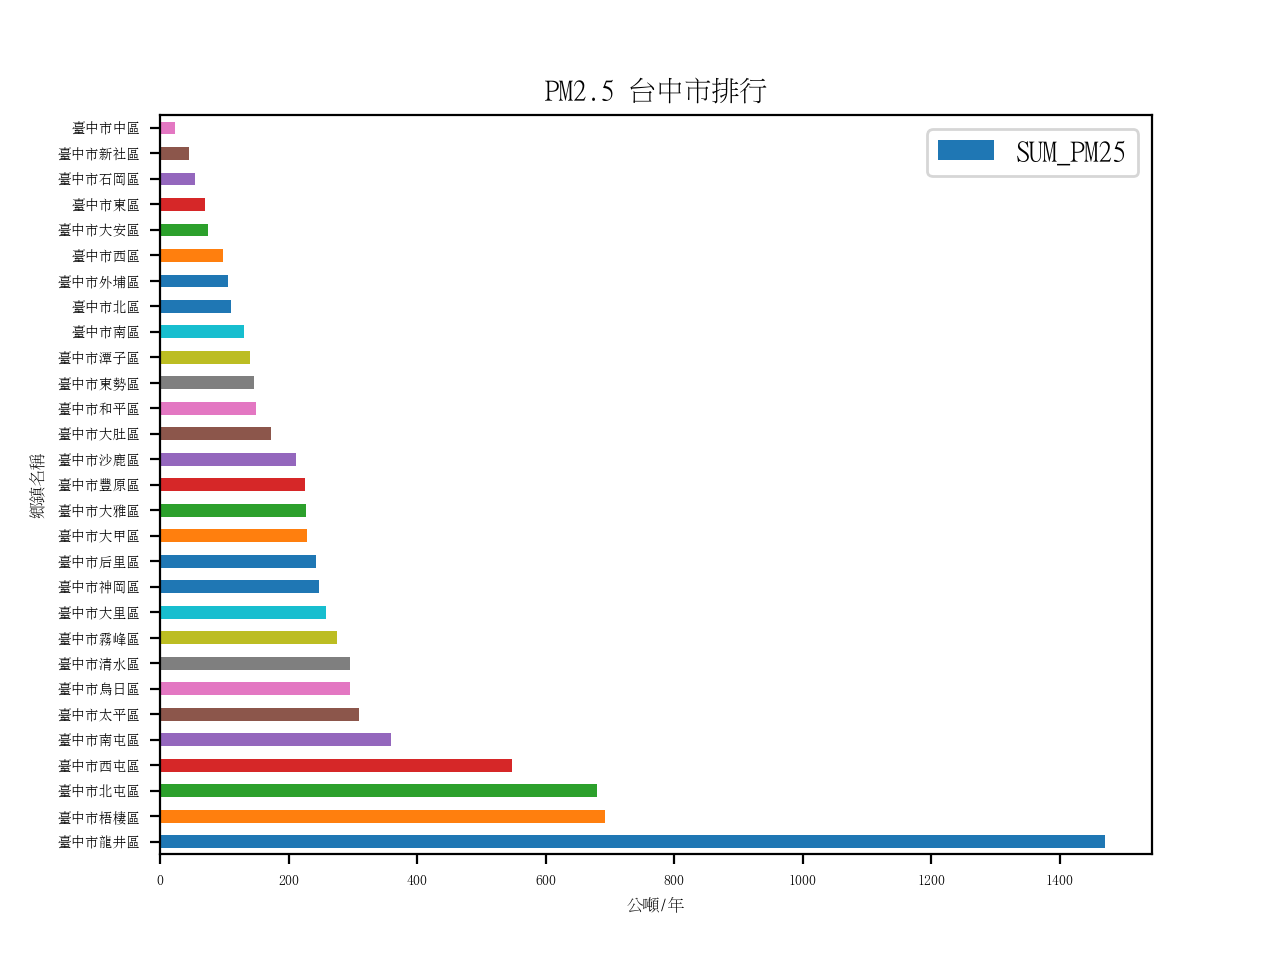

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text yticklabel objects>)

In [101]:
# 台中市排名
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pla_df[pla_df['縣市名稱']=='臺中市']
df = df.sort_values('SUM_PM25',ascending=False)
df=df[['AREA','POINT_PM25','LINE_PM25','AREA_PM25','SUM_PM25']].reset_index().drop('index',axis=1)


myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/MingLiU.ttf')
df.plot('AREA',y='SUM_PM25',kind='barh',use_index=True) #line type have problem
plt.title("PM2.5 台中市排行",fontproperties=myfont) 
plt.ylabel('鄉鎮名稱',fontproperties=myfont,size=6)
plt.xlabel('公噸/年',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)

In [80]:
# 資料驗證正確性
pd.set_option('display.max_rows', 20)
#pd.set_option('display.max_columns', None)
#area_df.groupby('DICT')['EM_PM25'].sum()
#point_df
print(point_df[point_df['DICT_NO']=='0102']['TSP_EMI'].sum())
print(line_df[line_df['DICT']=='0102']['EM_TSP'].sum())
print(area_df[area_df['DICT']=='0102']['EM_TSP'].sum())
#pla_df
pla_df[pla_df['鄉鎮代碼']==101][['POINT_PM25','LINE_PM25','AREA_PM25','SUM_PM25']]
#line_df.shape
#area_df.shape
#pla_df
#town_df.shape
#city_df.shape
#townp_df.shape

6.194
78.99558999999999
663.7007030000001


,POINT_PM25,LINE_PM25,AREA_PM25,SUM_PM25
0,2.546,46.409629,62.183747,111.139376


In [187]:
######   以下為備註的項目，可隨意刪除 ########

In [21]:
townp_df=pd.read_csv('output/town_people.csv') #8410
townp_df = townp_df.drop('0',axis=1)

In [40]:
#townp_df = townp_df.dropna()
#townp_df[townp_df['年底人口數']>0]
#townp_df(townp_df['區域別'].str.contains('群島'))
#townp_df.any(axis=1)
townp_df
#townp_df.info()
#townp_df=townp_df.astype({'人口密度': 'float64'})
#townp_df.mean()

,統計年,區域別,年底人口數,土地面積,人口密度
0,106.0,新北市板橋區,551480,23.1373,23835
1,106.0,新北市三重區,387484,16.3170,23747
2,106.0,新北市中和區,413590,20.1440,20532
3,106.0,新北市永和區,222585,5.7138,38956
4,106.0,新北市新莊區,416524,19.7383,21102
5,106.0,新北市新店區,302089,120.2255,2513
6,106.0,新北市樹林區,184149,33.1288,5559
7,106.0,新北市鶯歌區,86593,21.1248,4099
8,106.0,新北市三峽區,114926,191.4508,600
9,106.0,新北市淡水區,169597,70.6565,2400
